In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# EDA
* data analysis-- shape, info(), describe(), dtypes, corr()
* missing value analysis
* outlier analysis
* visualization--

## supervised model building part-- classification model
* independent and dependent data
* divide the data into train and test set
* create your model
* train your model
* test your model-- predict()
##  performance of the model-- accuracy score, confusion matrix, classification_report

In [5]:
# importing the data
df = pd.read_csv(r"C:\Users\asus\OneDrive\DS Intellipat\Excel\heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
# sex --> 1 - M, 0 - F
# cp --> chest pain (0,1,2,3)
# trestbps --> When a patient is resting, what's his blood pressure
# chol --> cholestrol level
# fbs --> Blood sugar level when the person is fasting
# restecg --> when a person is resting, what's his ecg
# thalach --> Maximum heart rate achieved
# exang --> chest pain for the people who hit gym very often. 0 -. NO CP, 1 -> CP
# oldpeak --> these are values of crest and trough of ecg
# slope --> slope values
# ca --> Maximum no. of major blood vessels --> 0,1,2,3
# thal --> 0,1,2
#         Genetic disorder
#         0 --> no genetic disorder
#         1 --> ganetic disorder(fixed effect)
#         2 --> genetic disorder(reversible)
# target --> whether the person is having a heart disease or not
#       0 --> The person is not having heart disease
#       1 --> The person is having a heart disease

In [6]:
df["fbs"].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [7]:
df["oldpeak"].value_counts()

0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: oldpeak, dtype: int64

In [8]:
df.shape


(303, 14)

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
df[df["chol"]>300].shape

(43, 14)

In [15]:
df[df["chol"]>300].count()

age         43
sex         43
cp          43
trestbps    43
chol        43
fbs         43
restecg     43
thalach     43
exang       43
oldpeak     43
slope       43
ca          43
thal        43
target      43
dtype: int64

In [17]:
df[(df["chol"]>300) & (df["age"] > 40)].shape

(42, 14)

### thal --> 0,1,2
###         Genetic disorder
###         0 --> no genetic disorder
###         1 --> ganetic disorder(fixed effect)
###         2 --> genetic disorder(reversible)


In [20]:
f = df[df["thal"] == 2]
f

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0


In [21]:
f[f['target']==1].shape


(130, 14)

In [23]:
df.describe(
)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Age distri')

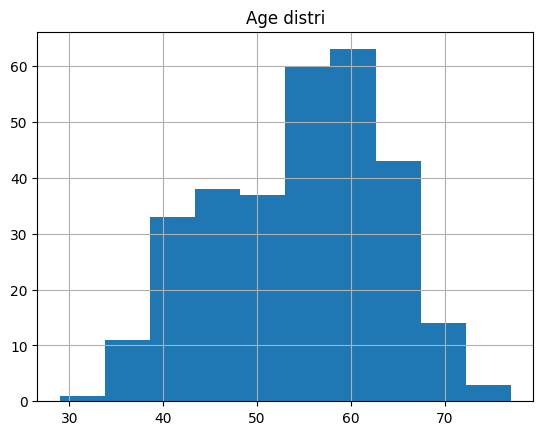

In [25]:
df["age"].hist(grid = True, bins = 10)
plt.title("Age distri")

C:\Users\asus\AppData\Local\Temp\ipykernel_17632\316555093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<AxesSubplot:xlabel='age', ylabel='Density'>

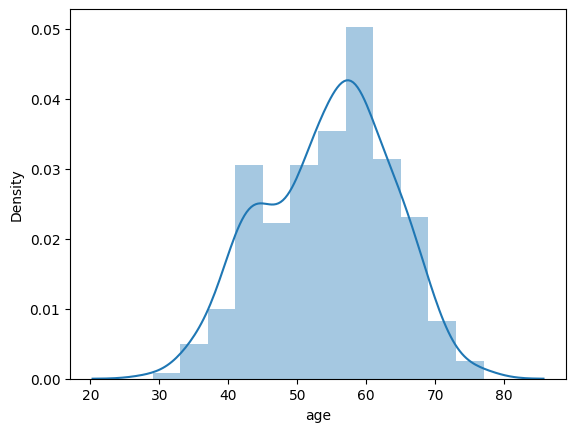

In [28]:
sns.distplot(df["age"])

<AxesSubplot:xlabel='oldpeak'>

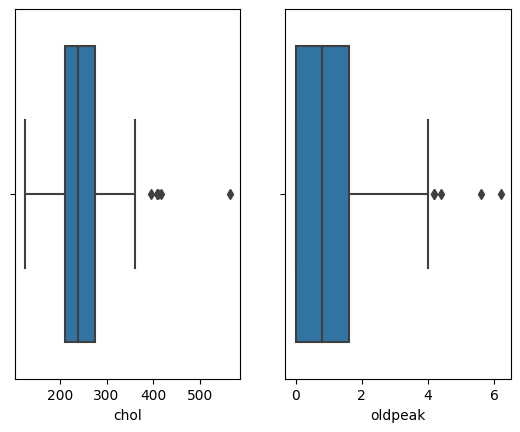

In [29]:
fig, axes = plt.subplots(nrows = 1, ncols=2)  # plt.subplots(2,1)
sns.boxplot(x='chol', data=df, ax=axes[0])
sns.boxplot(x='oldpeak', data=df, ax=axes[1])

In [31]:
# Outliers are not that much in these columns
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3-Q1
# IQR

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64

In [32]:
# data>=q1-1.5*IQR or data<=q3+1.5*IQR

NameError: name 'data' is not defined

Text(0.5, 1.0, 'Count of target feature by sex')

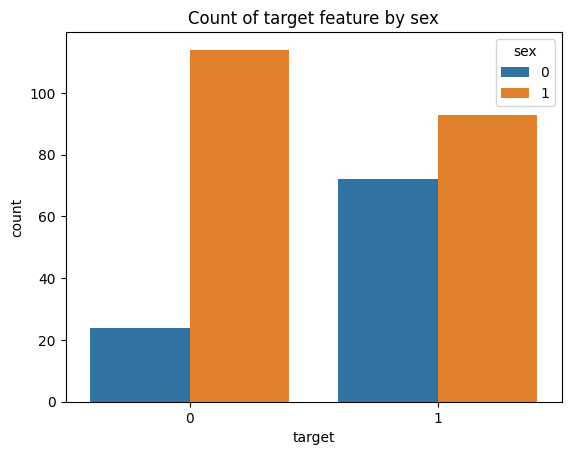

In [33]:
sns.countplot(x='target', hue='sex', data=df);
plt.title('Count of target feature by sex')

In [34]:
#supervised model building part-- classification model
#independent and dependent data
#divide the data into train and test set
#create your model
#train your model
#test your model-- predict()
#performance of the model-- accuracy score, confusion matrix, classification_report

In [36]:
X = df.iloc[:, :-1]#independent variable should always be in a dataframe format(2D) data
y = df['target']#dependent or target value
print(X.shape)
print(y.shape)

(303, 13)
(303,)
